# Доля легких ядер

In [1]:
!date
!pwd

Чтв Мар 16 17:44:23 MSK 2017
/home/sphere/Papers/Pictures/MassComposition/2017_Rus


In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [113]:
import seaborn as sns

# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })
sns.set(style="white", color_codes=True)

In [28]:
# === read SPHERE data
filename = './Data/frac'
sphere = pd.read_csv(filename, sep='\s+', index_col=None)
print(sphere.shape)
sphere = sphere[sphere.E > 6]
sphere['E'] = sphere.E * 1e15
sphere[:]

(7, 3)


,E,frac,err
1,1.050000e+16,0.456031,0.081608
2,2.100000e+16,0.251703,0.042707
3,4.200000e+16,0.327038,0.073026
4,8.400000e+16,0.130884,0.086044
5,1.680000e+17,0.681186,0.220691


In [3]:
yerr = np.array(sphere.err)
yerr

array([ 0.08160819,  0.0427072 ,  0.07302552,  0.08604414,  0.2206915 ])

In [22]:
def read_kascade_data(filename):
    tmp = pd.read_csv(filename, sep='\s+', index_col=None)
    print(tmp.shape)
    #tmp['E'] = 10**(tmp.logE - 15)
    tmp['E'] = 10**(tmp.logE)
    return tmp[['E','frac','errmin','errplus']]

In [23]:
# === read kascade data
filename = './Data/kascade_ratio.dat'
kascade = read_kascade_data(filename)
kascade [:3]

(13, 4)


,E,frac,errmin,errplus
0,4.471982e+16,0.244,0.018,0.015
1,5.642869e+16,0.225,0.020,0.018
2,7.090878e+16,0.212,0.023,0.021


In [24]:
# === read kascade Epos data
filename = './Data/epos_ratio.dat'
epos = read_kascade_data(filename)
epos[:3]

(16, 4)


,E,frac,errmin,errplus
0,1.778279e+16,0.782,0.028,0.021
1,2.249055e+16,0.793,0.028,0.028
2,2.824880e+16,0.789,0.035,0.031


In [25]:
# === read kascade sibyll data
filename = './Data/sibyll_ratio.dat'
sibyll = read_kascade_data(filename)
sibyll[:3]

(16, 4)


,E,frac,errmin,errplus
0,1.766038e+16,0.535,0.029,0.030
1,2.223310e+16,0.484,0.031,0.031
2,2.798981e+16,0.496,0.038,0.035


In [8]:
# -*- coding: utf-8 -*-

#решение проблемы с выводом на график русских шрифтов
from matplotlib import rcParams
rcParams['text.usetex']=False
rcParams['font.sans-serif'] = ['Liberation Sans']
rcParams['font.serif'] = ['Liberation Serif']
#pylab.rc('font',**{'family':'verdana'})

In [9]:
matplotlib.rc('font', **{'family':'verdana'})
matplotlib.rc('font', family='Verdana')

In [11]:
# Cyrillic letters in Matplotlib,
# thanks to Alexey for solution, see http://koldunov.net/?p=290#comments
from matplotlib import rc
rc('font',**{'family':'serif'})
#rc('text', usetex=False)
#rc('text.latex',unicode=True)
#rc('text.latex',preamble='\usepackage[utf8]{inputenc}')
#rc('text.latex',preamble = '\usepackage[russian]{babel}')

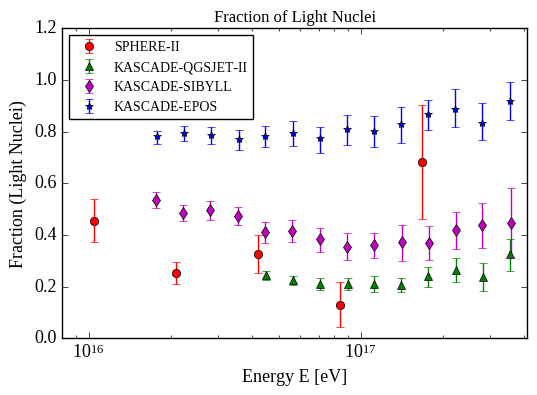

In [66]:
yerr = np.array(sphere.err)
plt.errorbar(sphere.E, sphere.frac,  yerr = [yerr,yerr], fmt='ro', label = u'SPHERE-II')

tmp = kascade
x,y,yerr1, yerr2 = tmp.E, tmp.frac, np.array(tmp.errmin), np.array(tmp.errplus)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE-QGSJET-II')

tmp = sibyll
x,y,yerr1, yerr2 = tmp.E, tmp.frac, np.array(tmp.errmin), np.array(tmp.errplus)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='md', label = r'KASCADE-SIBYLL')

yerr1 = np.array(epos.errmin)
yerr2 = np.array(epos.errplus)
plt.errorbar(epos.E, epos.frac,  yerr = [yerr1,yerr2], fmt='b*', label = r'KASCADE-EPOS')

# === оси и надписи ===
plt.axis([8e15, 410e15, 0., 1.2])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xscale('log') 
plt.xlabel('Energy E [eV]',           fontsize = 13)
plt.ylabel('Fraction (Light Nuclei)', fontsize = 13) #'large')
plt.title(u'Fraction of Light Nuclei')
plt.legend(loc=2, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.savefig('mass_comp.png', dpi=200)
plt.savefig('mass_comp.eps')

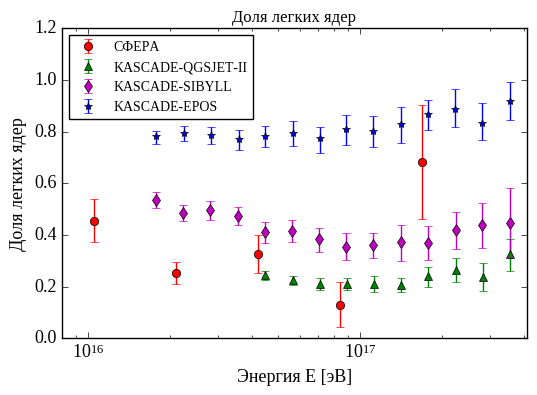

In [65]:
yerr = np.array(sphere.err)
plt.errorbar(sphere.E, sphere.frac,  yerr = [yerr,yerr], fmt='ro', label = u'СФЕРА')

tmp = kascade
x,y,yerr1, yerr2 = tmp.E, tmp.frac, np.array(tmp.errmin), np.array(tmp.errplus)
plt.errorbar(x, y,  yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE-QGSJET-II')

tmp = sibyll
x,y,yerr1, yerr2 = tmp.E, tmp.frac, np.array(tmp.errmin), np.array(tmp.errplus)
plt.errorbar(x, y,  yerr = [yerr1,yerr2], fmt='md', label = r'KASCADE-SIBYLL')

yerr1 = np.array(epos.errmin)
yerr2 = np.array(epos.errplus)
plt.errorbar(epos.E, epos.frac,  yerr = [yerr1,yerr2], fmt='b*', label = r'KASCADE-EPOS')

# === оси и надписи ===
plt.axis([8e15, 410e15, 0., 1.2])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xscale('log') 
plt.xlabel('Энергия E [эВ]',   fontsize = 13)
plt.ylabel('Доля легких ядер', fontsize = 13) #'large')
plt.title(u'Доля легких ядер')
plt.legend(loc=2, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.savefig('mass_comp_ru.png', dpi=200)
plt.savefig('mass_comp_ru.eps')